In [1]:
import re
import pandas as pd
import numpy as np

## lexicon and rule-based sentiment analysis 

- VADER belongs to a type of sentiment analysis that is based on lexicons of sentiment-related words. VADER’s lexicon, where more positive words have higher positive ratings and more negative words have lower negative ratings.
 
- https://github.com/cjhutto/vaderSentiment
- https://pythonprogramming.net/sentiment-analysis-python-textblob-vader/
- http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html

### Meaning of the compound score

 - The VADER algorithm outputs sentiment scores to 4 classes of sentiments 
 - the compound score is a normalized score of sum_s. 
 - sum_s is the sum of valence computed based on some heuristics and a sentiment lexicon (aka. Sentiment Intensity) 
 and
the normalized score is simply the sum_s divided by its square plus an alpha parameter that increases the denominator of the normalization function.
https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [3]:
wp = pd.read_csv('wp_all_sentence.csv', encoding = "cp949")
nyt = pd.read_csv('nyt_all_sentence.csv', encoding = "cp949")
wsj = pd.read_csv('wsj_all_sentence.csv', encoding = "cp949")
fox = pd.read_csv('fox_all_sentence.csv', encoding = "cp949")

### Making sentiment dataframe

In [4]:
def week_df(df, start_week, end_week):
    
    temp = df[(df.week >= start_week) & (df.week <= end_week)]
    if 'content' not in df:
        temp = temp.reset_index().iloc[:,2:8]
        # apply sentiment anlysis
        sentiment_list = []
        sentiment_list = [analyser.polarity_scores(x) for x in temp['title']]
        result = pd.concat([temp, pd.DataFrame(sentiment_list)], axis=1)
    
        # to avoid confusing to compound function in python
        result.columns = ['id', 'date', 'title', 'week', 'nation', "com", 'neg', 'neu', 'pos']
        # remove neutral variables
        result = result[(result.com >= 0.05) | (result.com <= -0.05)] 
        
    else:
        temp = temp.reset_index().iloc[:,2:9]
        # apply sentiment anlysis
        sentiment_list = []
        sentiment_list = [analyser.polarity_scores(x) for x in temp['content']]
        result = pd.concat([temp, pd.DataFrame(sentiment_list)], axis=1)
    
        # to avoid confusing to compound function in python
        result.columns = ['id', 'tot', 'date', 'title', 'content', 'nation', 'week', "com", 'neg', 'neu', 'pos']
        # remove meutral variables
        result = result[(result.com >= 0.05) | (result.com <= -0.05)] 
    
    return result

In [5]:
def sentiment_matrix(df, start_week, end_week):
    
    a = df[(df.week >= start_week) & (df.week <= end_week)].week.unique()
    mean_list =[]
    china_list = []
    nk_list = []
    sk_list = []
    japan_list =[]
    sam_list = []
    for week in a:
        temp = week_df(df, week, week)
        mean_list.append(temp.com.mean())
        china_list.append(temp[temp.nation == "c"].com.mean())
        nk_list.append(temp[temp.nation == "n"].com.mean())
        sk_list.append(temp[temp.nation == "k"].com.mean())
        japan_list.append(temp[temp.nation == "j"].com.mean())
        sam_list.append(np.unique(temp.nation, return_counts=True))
        
    sentiment_df = pd.DataFrame(list(zip(china_list, nk_list, sk_list, japan_list, sam_list)), 
                                columns =['china', 'nk', 'sk', 'japan', 'sample_size'], index=[a]) 
    return sentiment_df

In [6]:
fox_sent = sentiment_matrix(fox, 1, 35)
wp_sent = sentiment_matrix(wp, 1, 35)
nyt_sent =  sentiment_matrix(nyt, 1, 35)
wsj_sent =sentiment_matrix(wsj, 1, 35)

In [7]:
wp_sent

,china,nk,sk,japan,sample_size
1,0.017264,-0.053033,0.286174,0.058800,"([c, j, k, n], [556, 28, 42, 101])"
2,-0.026665,0.239573,0.064025,0.078694,"([c, j, k, n], [275, 36, 24, 15])"
3,-0.086068,0.038648,0.003340,-0.009879,"([c, j, k, n], [401, 39, 35, 97])"
4,0.016686,0.130560,0.062159,0.068793,"([c, j, k, n], [354, 76, 39, 30])"
5,0.135900,0.012778,0.114928,-0.004344,"([c, j, k, n], [393, 32, 43, 97])"
6,0.047897,0.054068,-0.088922,-0.001216,"([c, j, k, n], [253, 32, 27, 60])"
7,0.008156,-0.201121,0.230665,-0.017127,"([c, j, k, n], [376, 56, 40, 47])"
8,0.114615,0.052027,-0.049841,0.001425,"([c, j, k, n], [369, 40, 101, 362])"
9,0.045205,0.027303,0.052661,-0.097723,"([c, j, k, n], [490, 31, 135, 716])"
10,-0.005680,0.009224,0.121700,0.042144,"([c, j, k, n], [365, 34, 24, 121])"


In [8]:
fox_sent

,china,nk,sk,japan,sample_size
1,0.015633,-0.017181,0.329048,0.078433,"([c, j, k, n], [553, 15, 33, 90])"
2,-0.028300,0.239573,0.064025,-0.062975,"([c, j, k, n], [274, 24, 24, 15])"
3,-0.086540,0.020922,-0.000906,0.184859,"([c, j, k, n], [400, 22, 34, 92])"
4,0.016686,0.187780,0.034506,0.035323,"([c, j, k, n], [354, 53, 33, 20])"
5,0.135900,-0.013274,0.114928,-0.109992,"([c, j, k, n], [393, 25, 43, 93])"
6,0.047897,0.080810,0.120833,-0.099112,"([c, j, k, n], [253, 17, 6, 51])"
7,0.008156,-0.201121,0.271768,-0.011903,"([c, j, k, n], [376, 39, 37, 47])"
8,0.114615,0.050393,-0.051226,0.096635,"([c, j, k, n], [369, 20, 99, 357])"
9,0.046749,0.037356,0.042018,-0.067207,"([c, j, k, n], [489, 28, 119, 682])"
10,-0.005680,0.001245,0.043756,-0.077933,"([c, j, k, n], [365, 9, 16, 108])"


In [9]:
fox_df = week_df(fox, 1, 35)
wp_df = week_df(wp, 1, 35)
nyt_df = week_df(nyt, 1, 35)
wsj_df = week_df(wsj, 1, 35)

In [10]:
fox_df

,id,tot,date,title,content,nation,week,com,neg,neu,pos
0,315,315.150,2019-01-02,'Stalinist' Vietnamese cybersecurity law takes...,He says the law bears striking similarities to...,c,1,0.1531,0.129,0.714,0.157
1,315,315.160,2019-01-02,'Stalinist' Vietnamese cybersecurity law takes...,It's obviously inspired by the Chinese securit...,c,1,0.6150,0.000,0.714,0.286
3,316,316.900,2019-01-02,"As Hong Kong tightens screws on rebellion, dem...",The prosecution of Tai and his co-defendants c...,c,1,-0.8655,0.269,0.731,0.000
4,316,316.100,2019-01-02,"As Hong Kong tightens screws on rebellion, dem...",Critics say this could criminalize swathes of ...,c,1,-0.5423,0.170,0.830,0.000
5,316,316.370,2019-01-02,"As Hong Kong tightens screws on rebellion, dem...",The protest is often pointed to as an example ...,c,1,0.7096,0.072,0.645,0.283
6,316,316.420,2019-01-02,"As Hong Kong tightens screws on rebellion, dem...","In November, two events featuring Chinese diss...",c,1,-0.4215,0.149,0.851,0.000
7,317,317.230,2019-01-02,Japan's Emperor Akihito draws record numbers f...,Akihito has repeatedly expressed remorse for h...,c,1,-0.7427,0.191,0.809,0.000
8,318,318.100,2019-01-02,New acting secretary of defense tells Pentagon...,"On his first full day on the job, acting Secre...",c,1,0.1280,0.000,0.952,0.048
9,318,318.200,2019-01-02,New acting secretary of defense tells Pentagon...,While we're focused on ongoing operations acti...,c,1,0.3818,0.000,0.880,0.120
10,318,318.400,2019-01-02,New acting secretary of defense tells Pentagon...,His decision to urge the Pentagon's leadership...,c,1,-0.5267,0.064,0.936,0.000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

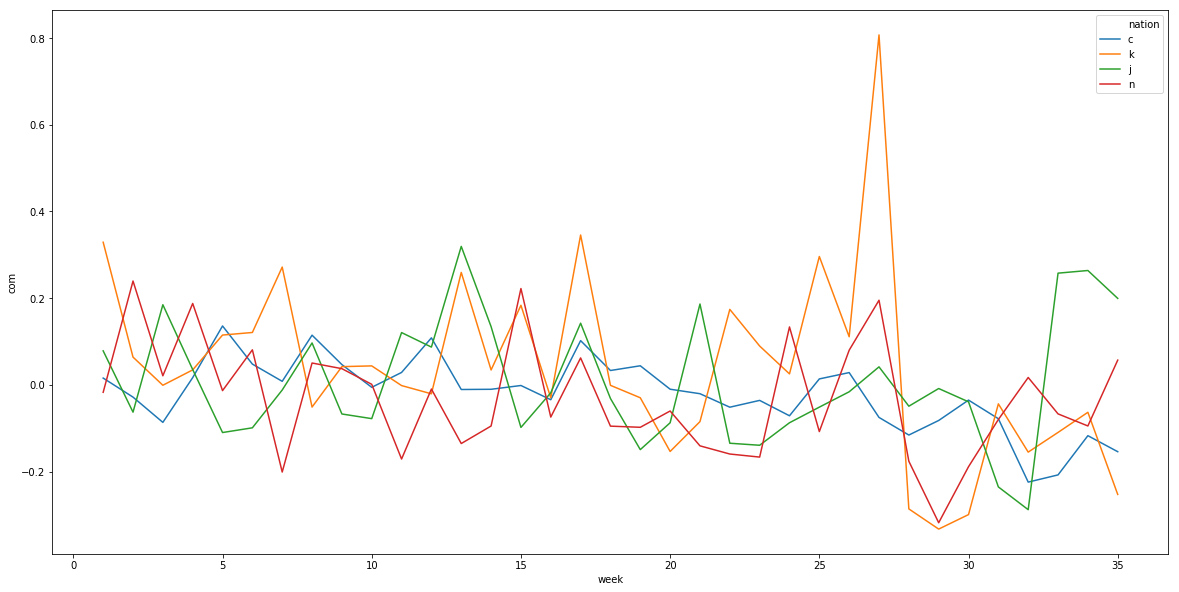

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.lineplot(x="week", y="com",
             hue="nation",
             data= fox_df, ax = ax, dashes = False, ci=None)

C:\Users\Juwon Oh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


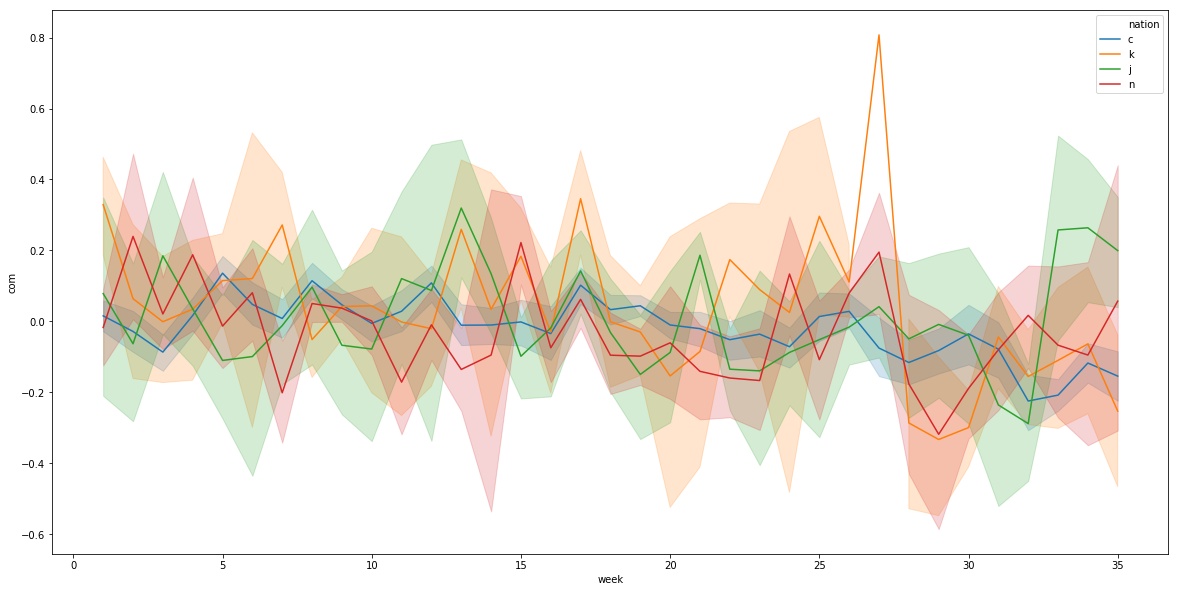

In [13]:
f, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="week", y="com",
             hue="nation",
             data= fox_df, ax = ax, dashes = False)

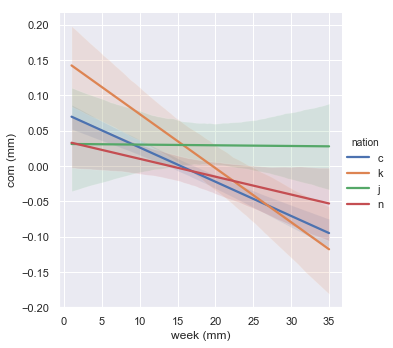

In [14]:

sns.set()


# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="week", y="com", hue="nation",
               truncate=True, height=5, data=fox_df, scatter = False)

# Use more informative axis labels than are provided by default
g.set_axis_labels("week (mm)", "com (mm)")


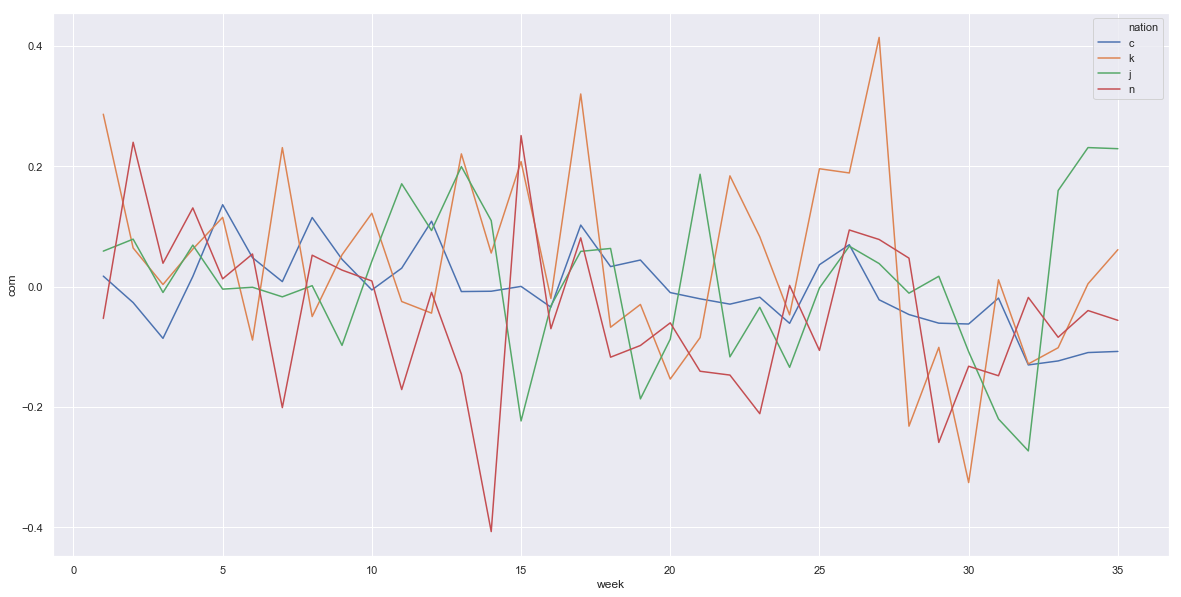

In [15]:
f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="week", y="com",
             hue="nation",
             data= nyt_df, ax = ax, dashes = False, ci=None)

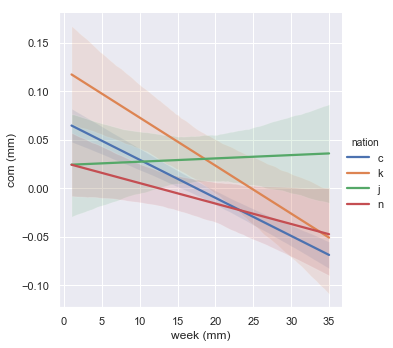

In [16]:
sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="week", y="com", hue="nation",
               truncate=True, height=5, data=nyt_df, scatter = False)

# Use more informative axis labels than are provided by default
g.set_axis_labels("week (mm)", "com (mm)")


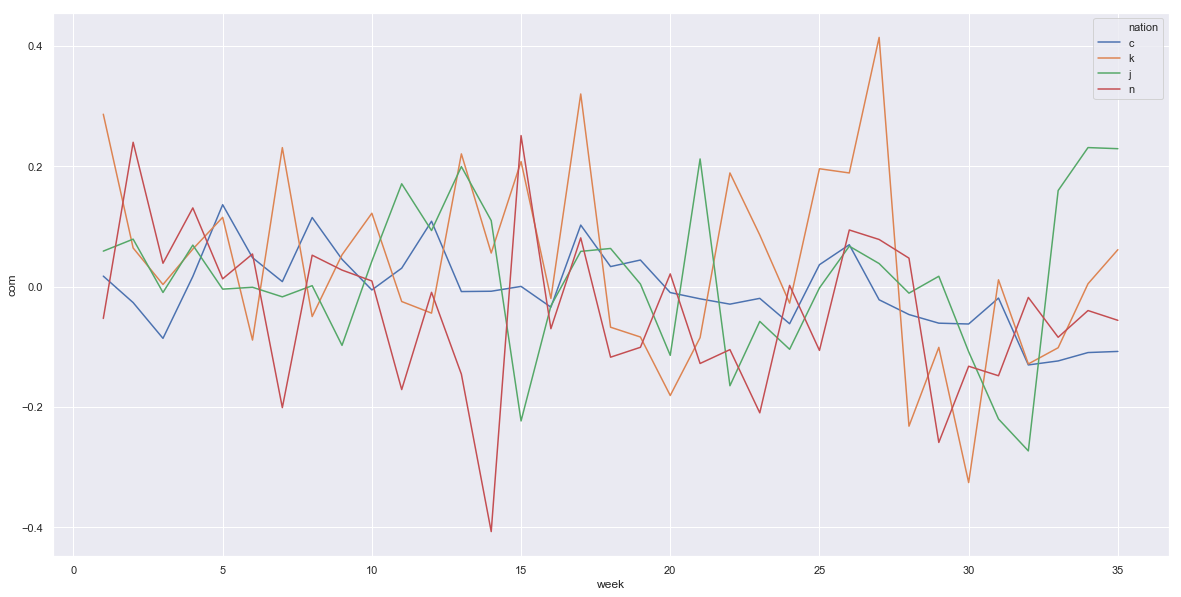

In [17]:
f, ax = plt.subplots(figsize= (20, 10))
sns.lineplot(x="week", y="com",
             hue="nation",
             data= wp_df, ax = ax, dashes = False, ci=None)

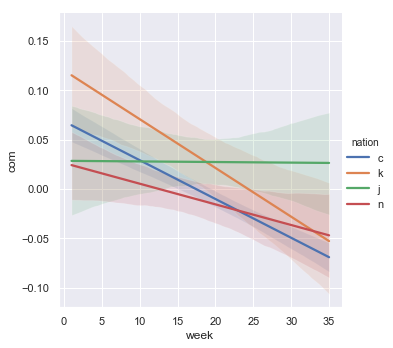

In [18]:
sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="week", y="com", hue="nation",
               truncate=True, height=5, data=wp_df, scatter = False)

# Use more informative axis labels than are provided by default
g.set_axis_labels("week", "com")


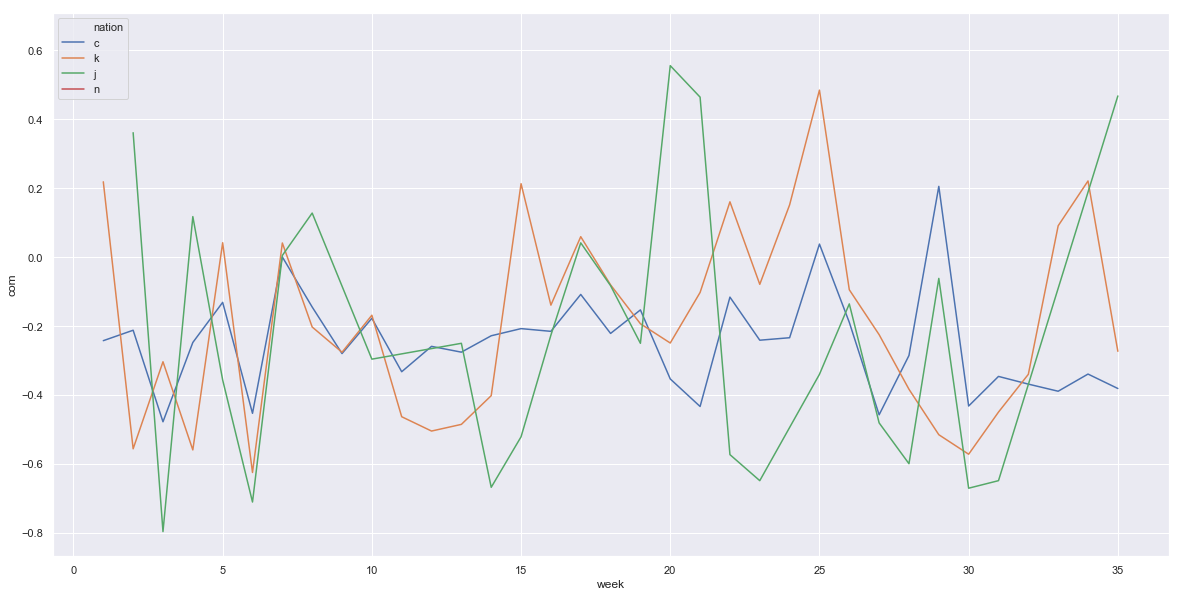

In [19]:
f, ax = plt.subplots(figsize= (20, 10))
sns.lineplot(x="week", y="com",
             hue="nation",
             data= wsj_df, ax = ax, dashes = False, ci=None)

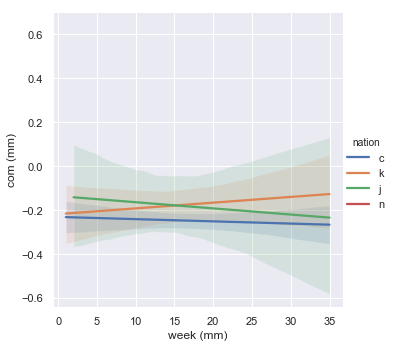

In [20]:

sns.set()

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="week", y="com", hue="nation",
               truncate=True, height=5, data=wsj_df, scatter = False)

# Use more informative axis labels than are provided by default
g.set_axis_labels("week (mm)", "com (mm)")


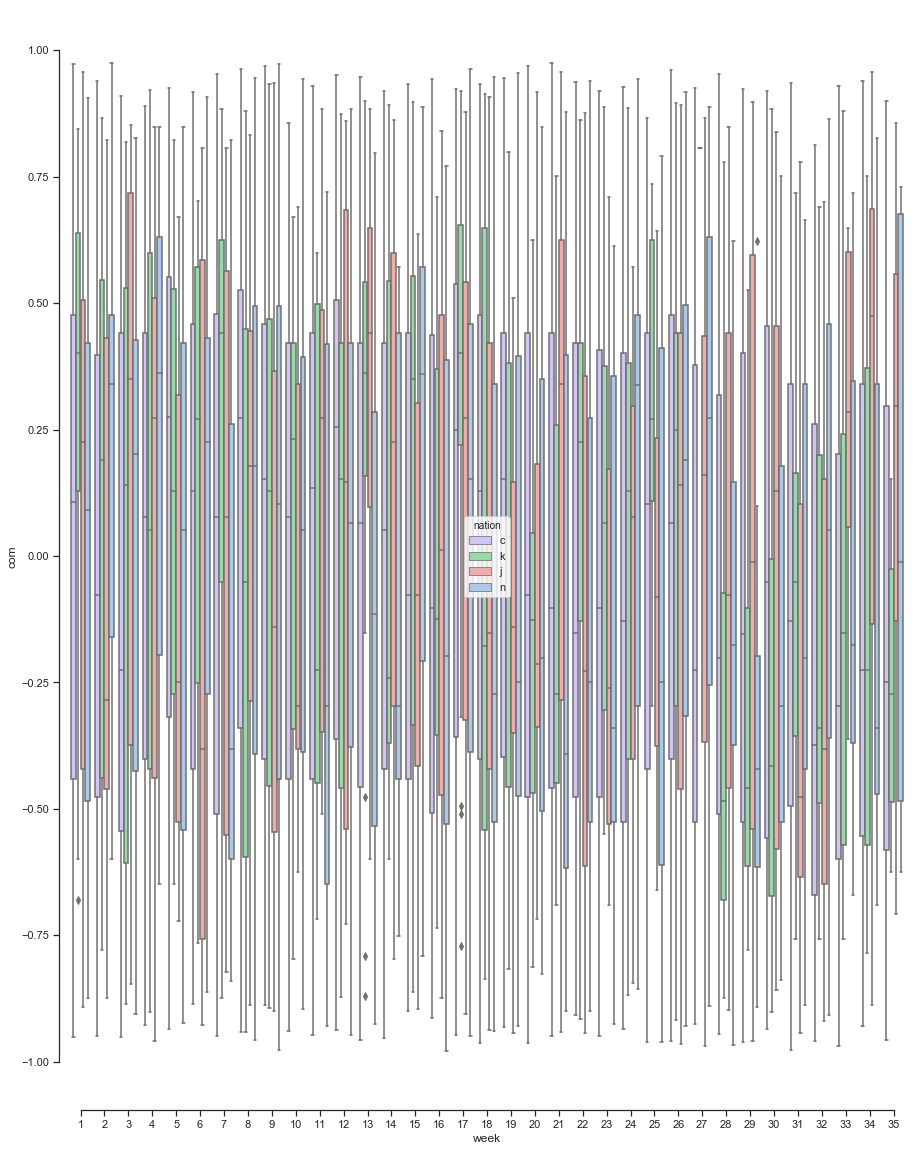

In [21]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
f, ax = plt.subplots(figsize=(15, 20))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="week", y="com",
            hue="nation", palette=["m", "g", "r", "b"],
            data= fox_df, ax = ax)
sns.despine(offset=10, trim=True)

### Another considers

##### Deep learning training, word embedding
- https://gitlab.com/praj88/deepsentiment/tree/master
- https://towardsdatascience.com/sentiment-analysis-for-text-with-deep-learning-2f0a0c6472b5
- https://towardsdatascience.com/word-embeddings-for-sentiment-analysis-65f42ea5d26e
- https://www.kaggle.com/bertcarremans/using-word-embeddings-for-sentiment-analysis

problem: More sentences are needed to fully learn the neural network. If you do not learn enough with a lot of data, you will lose accuracy. If you have enough data, you will try later.

##### Machine learning - Ngram sentiment analysis with skitlearn and nltk

 
- https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386
- https://towardsdatascience.com/sentiment-analysis-with-python-part-2-4f71e7bde59a


